In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Cardiotocographic.csv")

In [ ]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
df.isnull().sum()

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [5]:
# Fill missing numeric columns with median
df = df.fillna(df.median(numeric_only=True))


In [6]:
df.isnull().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


In [13]:
outliers={}

for col in df.select_dtypes(include='number').columns:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1


  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR

  outliers[col]=df[(df[col]<lower) | (df[col]>upper)].index.tolist()
  print(f"{col}: {len(outliers[col])}")

LB: 10
AC: 43
FM: 347
UC: 13
DL: 125
DS: 120
DP: 284
ASTV: 10
MSTV: 80
ALTV: 318
MLTV: 81
Width: 10
Tendency: 10
NSP: 559


In [14]:
import numpy as np

df_capped = df.copy()

for col in df_capped.select_dtypes(include=['float64','int64']).columns:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap values
    df_capped[col] = np.where(df_capped[col] < lower, lower,
                        np.where(df_capped[col] > upper, upper, df_capped[col]))


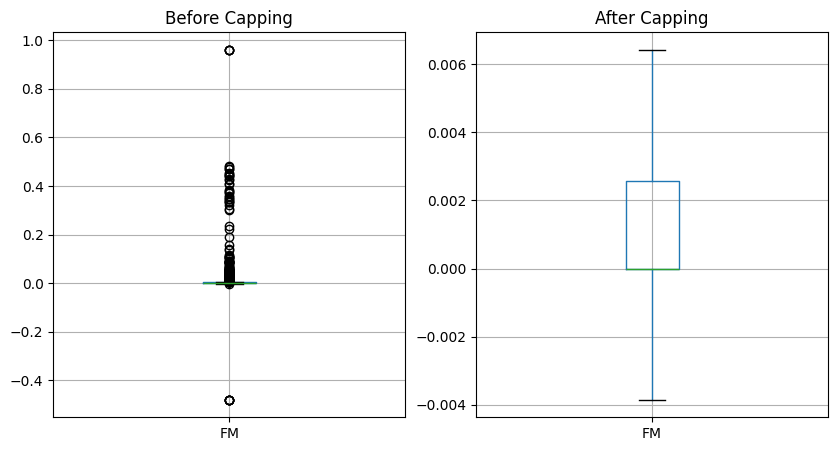

In [21]:
import matplotlib.pyplot as plt

col = "FM"  # change to any column
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df.boxplot(column=col)
plt.title("Before Capping")

plt.subplot(1,2,2)
df_capped.boxplot(column=col)
plt.title("After Capping")

plt.show()


In [22]:
####2.	Statistical Summary:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.340204,0.003204,0.009894,0.004391,0.001895,0.000002,0.000173,46.995984,1.364378,10.285964,8.276147,70.395387,0.313246,1.301499
std,11.214379,0.004373,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734851,42.720508,0.643186,0.642133
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


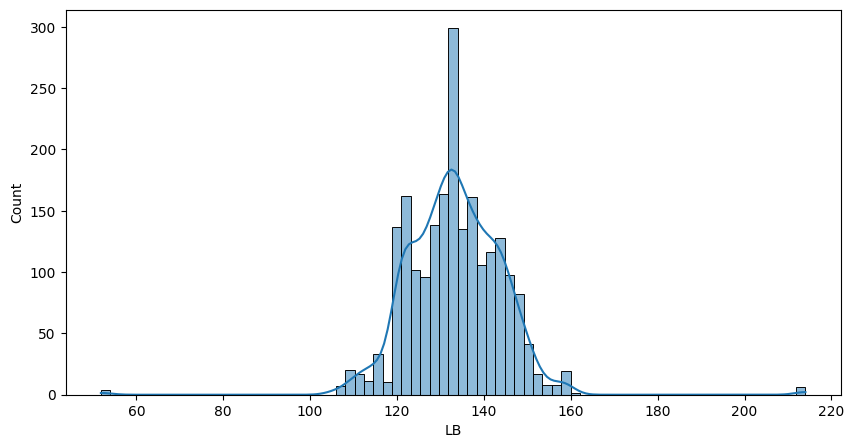

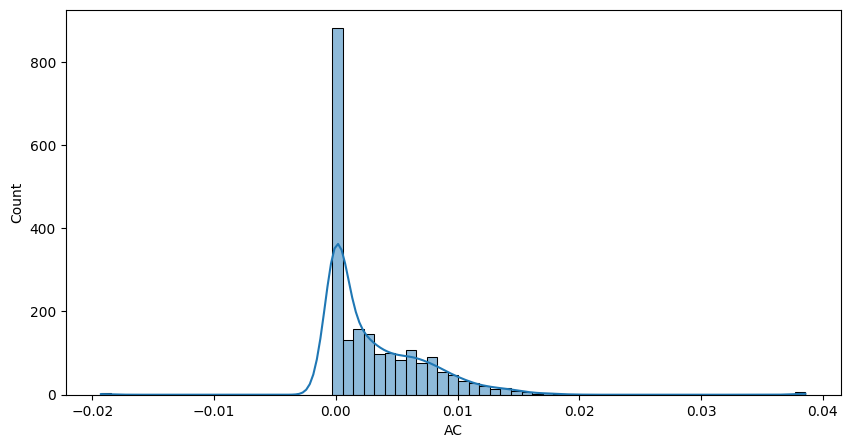

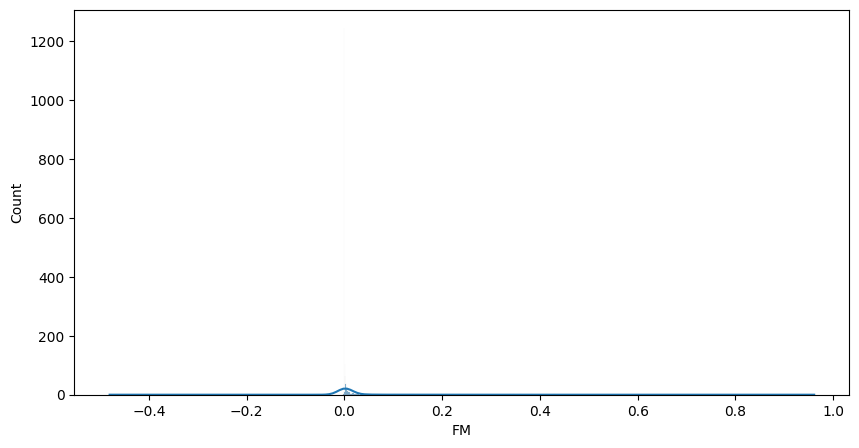

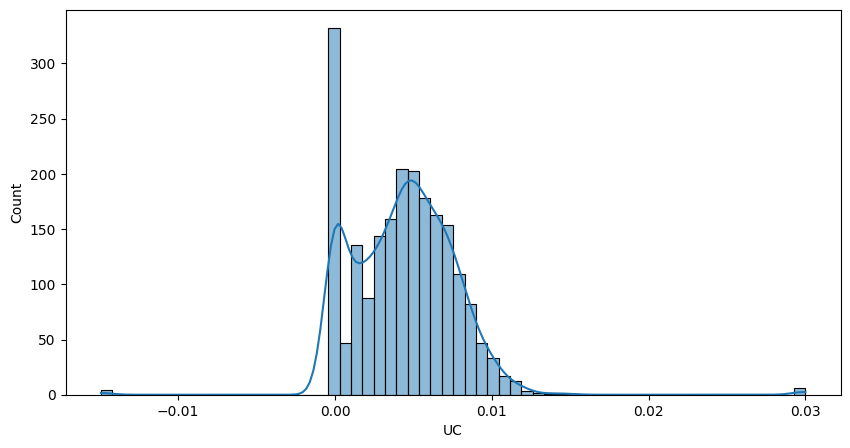

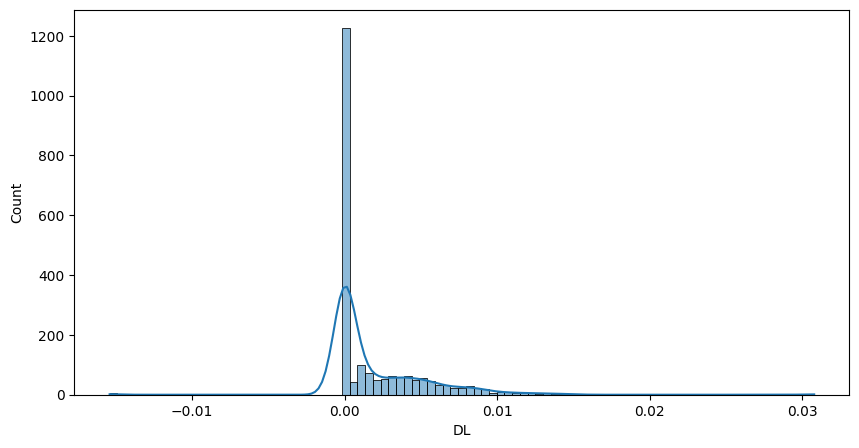

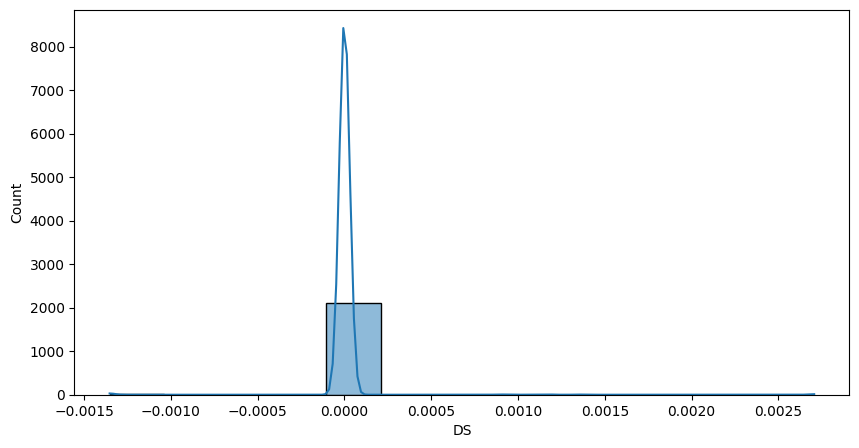

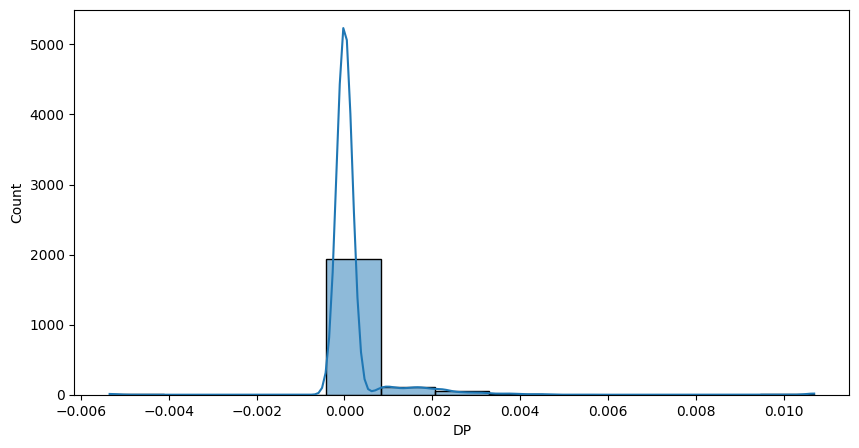

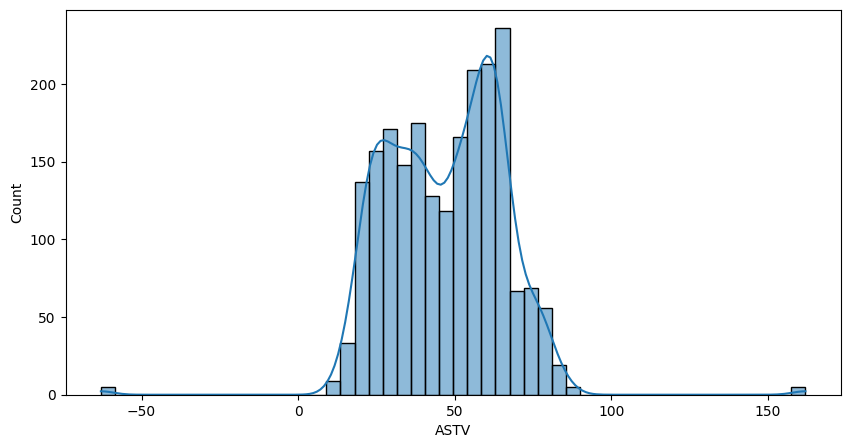

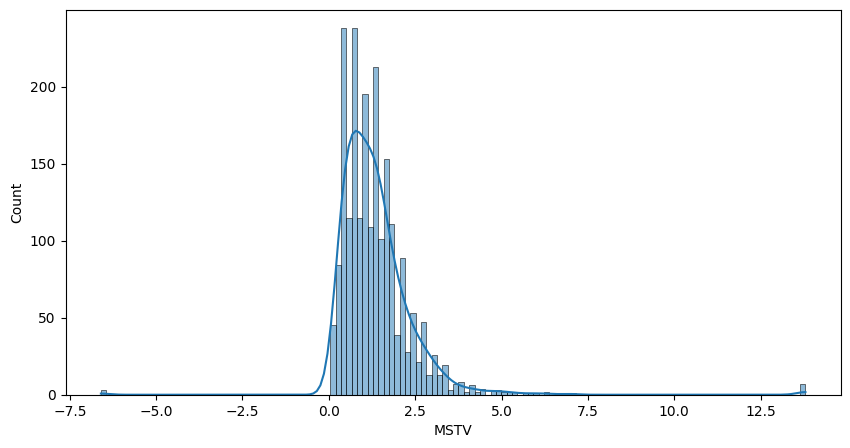

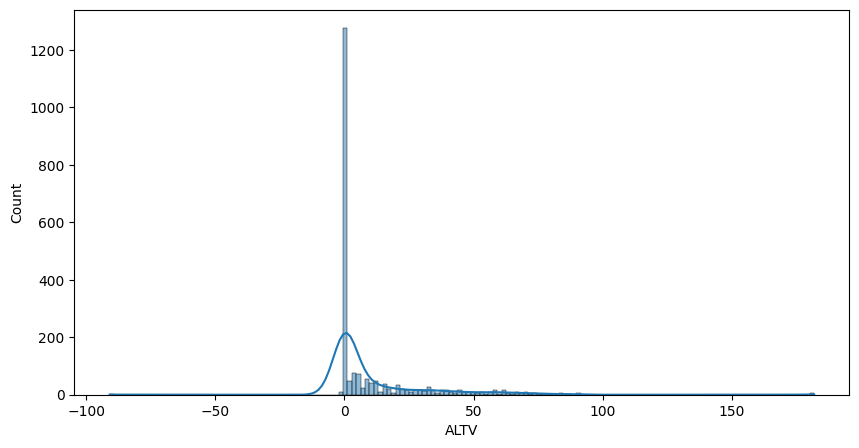

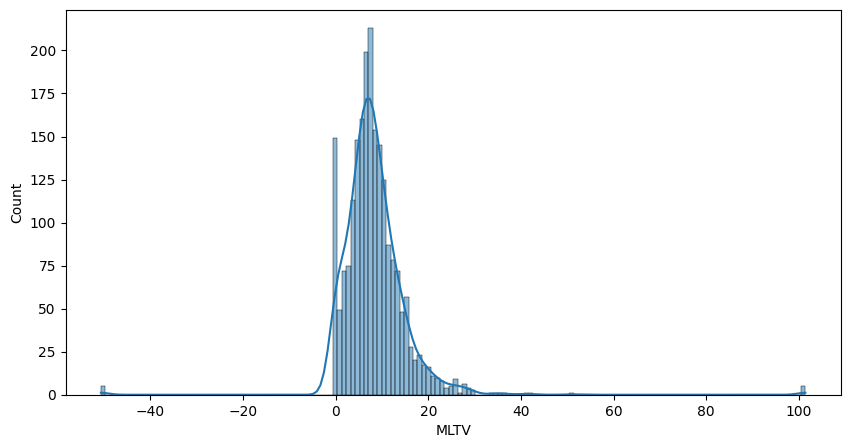

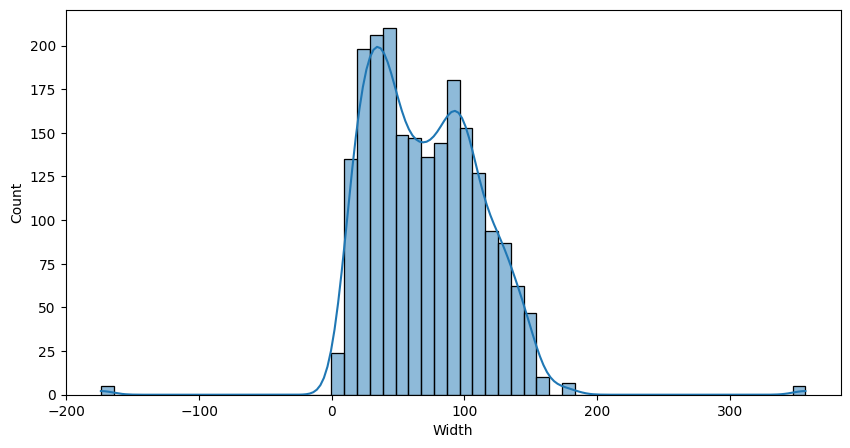

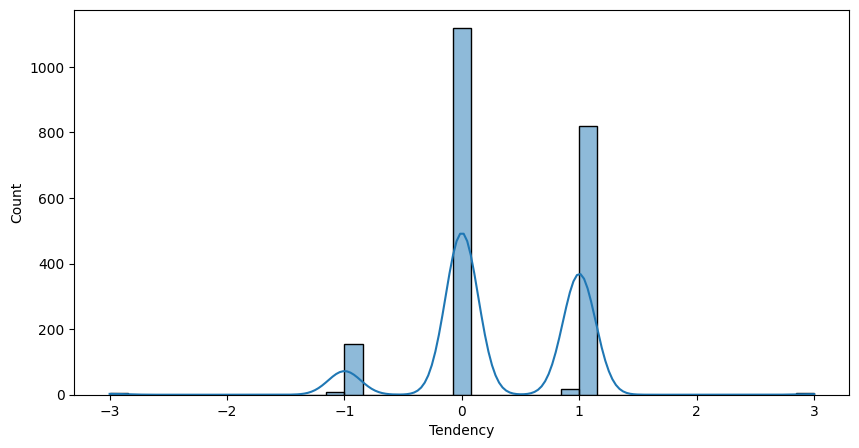

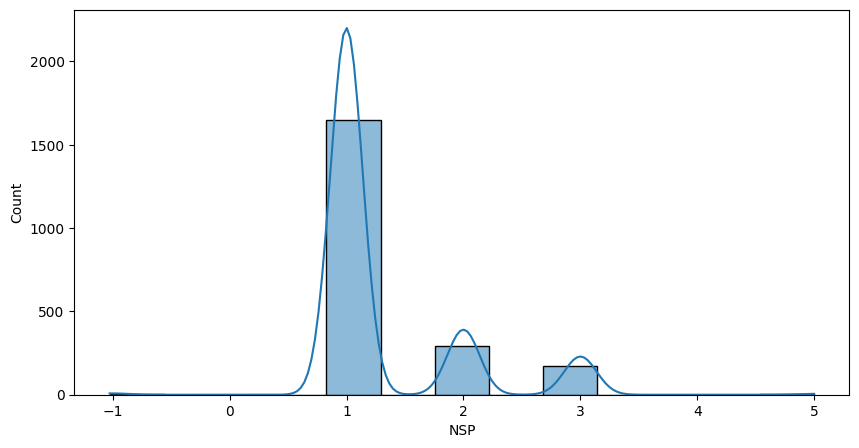

In [23]:
##3.	Data Visualization:
import seaborn as sns
for col in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(10,5))
  sns.histplot(df[col],kde=True)
  plt.show()

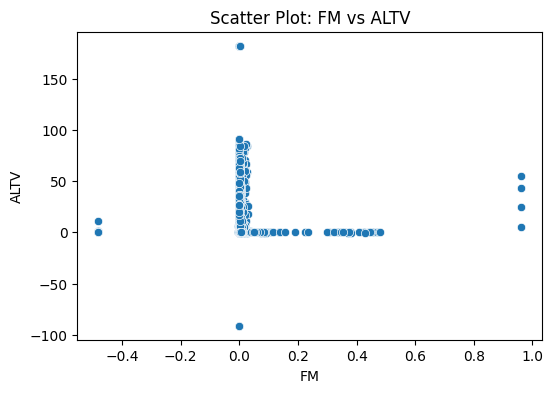

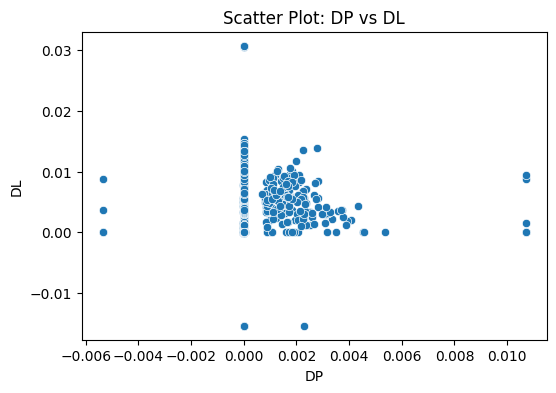

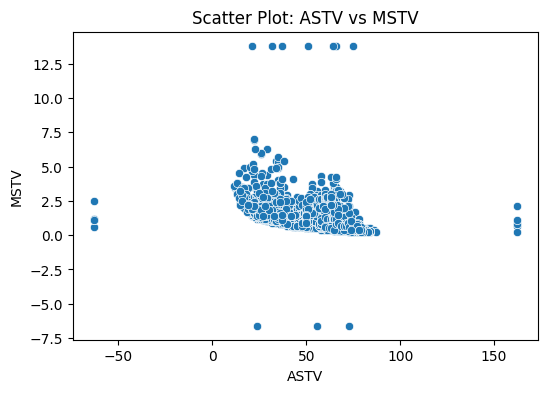

In [25]:
selected_pairs = [('FM', 'ALTV'), ('DP', 'DL'), ('ASTV', 'MSTV')]

for x, y in selected_pairs:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[x], y=df[y])
    plt.title(f"Scatter Plot: {x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


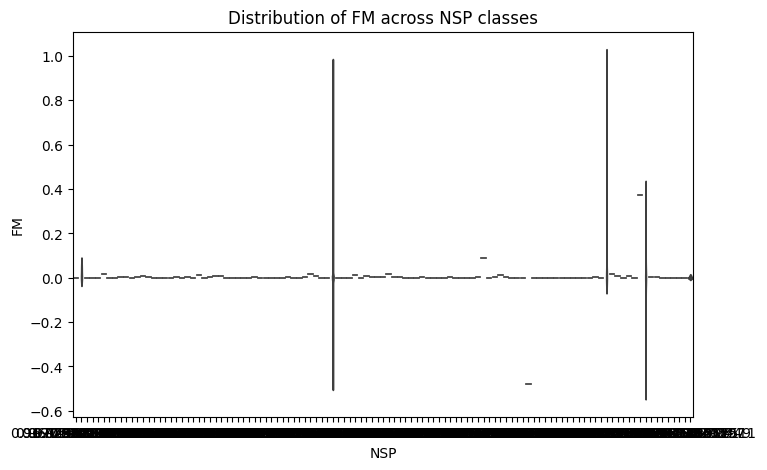

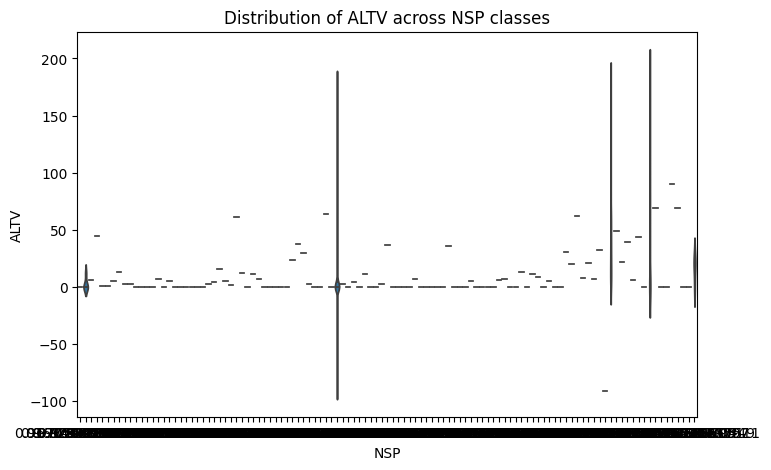

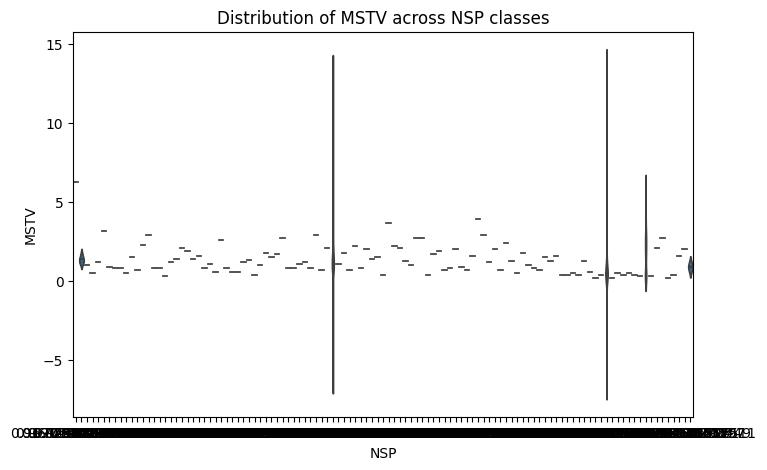

In [28]:
numeric_cols = ["FM", "ALTV", "MSTV"]

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.violinplot(x="NSP", y=col, data=df, inner="quartile")
    plt.title(f"Distribution of {col} across NSP classes")
    plt.show()

In [30]:
# Calculate and display the correlation matrix
correlation_matrix = df.corr()
display(correlation_matrix)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.062813,0.018807,-0.166229,-0.126563,-0.005432,-0.047650,0.241857,-0.169647,0.210542,-0.003423,-0.118397,0.236730,0.131839
AC,-0.062813,1.000000,0.009768,0.071621,-0.093449,-0.033088,-0.083298,-0.230470,0.132962,-0.269807,-0.104853,0.234549,0.031710,-0.311689
FM,0.018807,0.009768,1.000000,-0.053226,0.009718,0.029916,0.121459,-0.032691,0.017055,-0.011936,-0.006121,0.097282,-0.017819,0.074446
UC,-0.166229,0.071621,-0.053226,1.000000,0.190128,-0.006938,0.070295,-0.181161,0.189406,-0.227304,-0.049452,0.107083,-0.066832,-0.185229
DL,-0.126563,-0.093449,0.009718,0.190128,1.000000,0.058413,0.144717,-0.069361,0.410102,-0.186967,-0.165293,0.408578,-0.023914,0.024879
DS,-0.005432,-0.033088,0.029916,-0.006938,0.058413,1.000000,0.004321,0.008426,0.016026,-0.004335,0.034367,0.040845,-0.015294,0.065411
DP,-0.047650,-0.083298,0.121459,0.070295,0.144717,0.004321,1.000000,0.038119,0.118628,-0.076975,-0.113818,0.175462,-0.129204,0.295057
ASTV,0.241857,-0.230470,-0.032691,-0.181161,-0.069361,0.008426,0.038119,1.000000,-0.293882,0.357497,-0.219709,-0.206931,-0.010855,0.420873
MSTV,-0.169647,0.132962,0.017055,0.189406,0.410102,0.016026,0.118628,-0.293882,1.000000,-0.291935,0.028452,0.432822,-0.038017,-0.095876
ALTV,0.210542,-0.269807,-0.011936,-0.227304,-0.186967,-0.004335,-0.076975,0.357497,-0.291935,1.000000,-0.107200,-0.345732,0.038234,0.366454


In [32]:
## 0 - 0.5 weak +ve corr
#0.5 - 0.7 moderate +ve corr
#0.7 - 1 strong +ve corr


In [33]:
## 0 to  -0.5 weak -ve corr
##-0.5 to -0.7 moderate -ve corr
##-0.7 to -1 strong -ve corr

In [34]:
#conclusion
#The EDA revealed that while some features are redundant or sparse, several variability and deceleration-based measures strongly differentiate fetal states. This provides a solid foundation for predictive modeling and can directly support better risk stratification and clinical decision-making.